### Today Objectives:

* Regularization models
    * Ridge/L2-Regularization
    * Lasso/L1-Regularization
* Classfication models
    * Logistic Regression

### Regularization

* Regularization is tuning techique used for
    * Attempt to solve the overfitting(low bias and high variance) problems
    * Reduce the errors by fitting functions on given dataset and avoid offerfitting
    * For Generalized models
    * Improves the model performance on the unseen data as well
    
### Ridge Regression:

* It converts the high variance to low variance

* syntax : sum(actual-predict)^2 + ld((slop)^2)
    
    
    

In [1]:
import pandas as pd
import numpy as np


In [2]:
d={'exp':[1,2,3,4,5,6],'esal':[1000,2000,3000,4000,5000,6000]}
df=pd.DataFrame(d)
df

,exp,esal
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000
5,6,6000


In [3]:
#select input and output

x=df[['exp']]
y=df['esal']

In [4]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [6]:
# find the score
model.score(x,y)*100

100.0

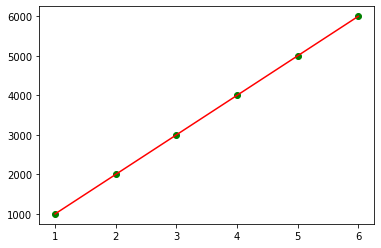

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='g')
plt.plot(x,model.predict(x),color='r')
plt.show()

In [9]:
# Ridge Regression
from sklearn.linear_model import Ridge
r=Ridge()
r.fit(x,y)

Ridge()

In [10]:
# find the score
r.score(x,y)

0.9970781592403214

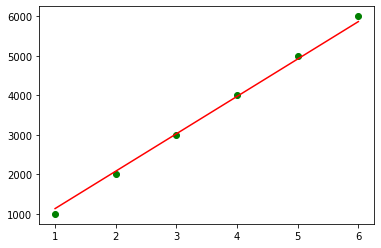

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='g')
plt.plot(x,r.predict(x),color='r')
plt.show()

In [12]:
# apply Linear and Ridge into boston dataset
from sklearn.datasets import load_boston
d=load_boston()
d

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [14]:
# data prepare
df=pd.DataFrame(d.data,columns=d.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df['Target']=d.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# select input and output
x=df.drop('Target',axis=1)
y=df['Target']

In [17]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
# select algo
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# find the score
print("Training score:",model.score(x_train,y_train))
print("Testing score:",model.score(x_test,y_test))

Training score: 0.7508856358979673
Testing score: 0.6687594935356315


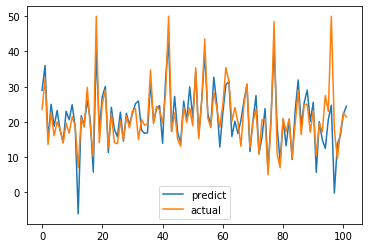

In [26]:
import matplotlib.pyplot as plt
y_pred=model.predict(x_test)
plt.plot(y_pred,label="predict")
plt.plot(y_test.values,label="actual")
plt.legend()
plt.show()

In [27]:
# Ridge Regression
from sklearn.linear_model import Ridge
r=Ridge()
r.fit(x_train,y_train)

Ridge()

In [29]:
# find the score:
print("training score:",r.score(x_train,y_train))
print("test score: ",r.score(x_test,y_test))

training score: 0.7487825119234439
test score:  0.6662221670168522


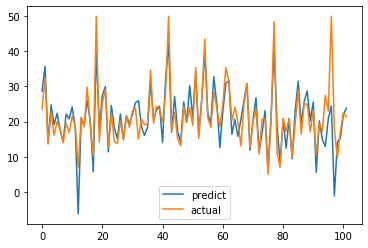

In [30]:
import matplotlib.pyplot as plt
y_pred=r.predict(x_test)
plt.plot(y_pred,label="predict")
plt.plot(y_test.values,label="actual")
plt.legend()
plt.show()

In [31]:
model.predict([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14]])

array([25.18152388])

### Lasso Regression:

* It converts the high variance to low variance

* syntax : sum(actual-predict)^2 + ld(|slop|)

* It remove where slope value zero features

In [32]:
# Lasso Regression
from sklearn.linear_model import Lasso
l=Lasso()
l.fit(x_train,y_train)

Lasso()

In [33]:
# find the score
print("training score:",l.score(x_train,y_train))
print("testing score:",l.score(x_test,y_test))

training score: 0.6959153721670905
testing score: 0.6671453631686304


In [34]:
# testing score/predict score
from sklearn.metrics import r2_score
y_pred=l.predict(x_test)
print("score is:",r2_score(y_test,y_pred))

score is: 0.6671453631686304


In [35]:
# r2-score is evaluation metric score in regression
# accuracy score is evaluation metric score in classfication

### Logistic Regression

* Logistic regression is classfication technique in supervised machine learning
* It belongs to group of linear classfiers
* It will perform the sigmoid function for classifing the data

* syntax: f(x)=1/1+e^(-x)

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
d=load_breast_cancer()
df=pd.DataFrame(d.data,columns=d.feature_names)
df['Target']=d.target
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
389,19.55,23.21,128.90,1174.0,0.1010,0.13180,0.18560,0.10210,0.1989,0.05884,...,30.44,142.00,1313.0,0.1251,0.2414,0.38290,0.18250,0.2576,0.07602,0
142,11.43,17.31,73.66,398.0,0.1092,0.09486,0.02031,0.01861,0.1645,0.06562,...,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096,1
80,11.45,20.97,73.81,401.5,0.1102,0.09362,0.04591,0.02233,0.1842,0.07005,...,32.16,84.53,525.1,0.1557,0.1676,0.17550,0.06127,0.2762,0.08851,1
208,13.11,22.54,87.02,529.4,0.1002,0.14830,0.08705,0.05102,0.1850,0.07310,...,29.16,99.48,639.3,0.1349,0.4402,0.31620,0.11260,0.4128,0.10760,1
355,12.56,19.07,81.92,485.8,0.0876,0.10380,0.10300,0.04391,0.1533,0.06184,...,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188,1


In [39]:
df['Target'].unique()

array([0, 1])

In [40]:
df['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [41]:
x=df.drop('Target',axis=1)
y=df['Target']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
print("trainign samples: ",x_train.shape,y_train.shape)
print("testing samples: ",x_test.shape,y_test.shape)

trainign samples:  (455, 30) (455,)
testing samples:  (114, 30) (114,)


In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Kanakamma\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [58]:
# find the score
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("training score: ",model.score(x_train,y_train))
print("score is: ",accuracy_score(y_test,y_pred))

training score:  0.9560439560439561
score is:  0.956140350877193


In [53]:
#model.predict([[19.55	23.21	128.90	1174.0	0.1010	0.13180	0.18560	0.10210	0.1989	0.05884	...	30.44,142.00,1313.0,0.1251,0.2414,0.38290,0.18250,0.2576,0.07602]])

In [60]:
# print the dataframe for actual and predict
df2=pd.DataFrame({'actual':y_test,'predict':y_pred})
df2

,actual,predict
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1
...,...,...
486,1,1
75,0,0
249,1,1
238,1,0


In [68]:
# iris dataset
from sklearn.datasets import load_iris
d=load_iris()
df=pd.DataFrame(d.data,columns=d.feature_names)
df['Target']=d.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
55,5.7,2.8,4.5,1.3,1
2,4.7,3.2,1.3,0.2,0
91,6.1,3.0,4.6,1.4,1
143,6.8,3.2,5.9,2.3,2
115,6.4,3.2,5.3,2.3,2


In [62]:
d

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [63]:
x=df.drop('Target',axis=1)
y=df['Target']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Kanakamma\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [66]:
# find the score
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)

print("training score: ",model.score(x_train,y_train))
print("score is: ",accuracy_score(y_test,y_pred))

training score:  0.975
score is:  1.0


In [67]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [70]:
model.predict([[6.1,3.0,4.6,1.4]])

array([1])

In [97]:
# print the dataframe for actual and predict
df2=pd.DataFrame({'actual':y_test,'predict':y_pred})
df2.head()

,actual,predict
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [98]:
ypredict=model.predict([[6.7,3.1,4.8,6.4]])
yactual=[2]
accuracy_score(yactual,ypredict)
#model.score(yactual,ypredict)
model.predict([[6.7,3.1,4.8,6.4]])

array([2])